# 1: Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re # For potential cleaning

# Configure plots for better display
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

Explanation:
This cell imports all the libraries we'll need for the analysis:

pandas: For creating and manipulating DataFrames (tabular data).

numpy: For numerical operations (often used by pandas).

matplotlib.pyplot and seaborn: For creating visualizations (plots and graphs).

scipy.stats: For performing statistical hypothesis tests.

re: For regular expressions, useful for advanced text cleaning if needed.
We also set some basic seaborn styling and a default figure size for our plots to make them look nicer.

# 2: Load Simulated Election Data

In [2]:
# --- Data Collection (Simulated - Step 1: Election Data) ---
# IMPORTANT: In your real project, replace this block with your actual code
# to scrape or load the 'sozcu_election_data.csv' file.

election_data = {
    'province': ['Adana', 'Adana', 'Adana', 'Ankara', 'Ankara', 'Ankara', 'Izmir', 'Izmir', 'Izmir', 'Istanbul', 'Istanbul', 'Istanbul', 'Konya', 'Konya', 'Konya', 'Diyarbakir', 'Diyarbakir', 'Diyarbakir'],
    'candidate': ['RECEP TAYYİP ERDOĞAN', 'KEMAL KILIÇDAROĞLU', 'SİNAN OĞAN', 'RECEP TAYYİP ERDOĞAN', 'KEMAL KILIÇDAROĞLU', 'SİNAN OĞAN', 'RECEP TAYYİP ERDOĞAN', 'KEMAL KILIÇDAROĞLU', 'SİNAN OĞAN', 'RECEP TAYYİP ERDOĞAN', 'KEMAL KILIÇDAROĞLU', 'SİNAN OĞAN', 'RECEP TAYYİP ERDOĞAN', 'KEMAL KILIÇDAROĞLU', 'SİNAN OĞAN', 'RECEP TAYYİP ERDOĞAN', 'KEMAL KILIÇDAROĞLU', 'SİNAN OĞAN'],
    'party': ['Cumhur İttifakı', 'Millet İttifakı', 'ATA İttifakı','Cumhur İttifakı', 'Millet İttifakı', 'ATA İttifakı','Cumhur İttifakı', 'Millet İttifakı', 'ATA İttifakı','Cumhur İttifakı', 'Millet İttifakı', 'ATA İttifakı','Cumhur İttifakı', 'Millet İttifakı', 'ATA İttifakı','Cumhur İttifakı', 'Millet İttifakı', 'ATA İttifakı'],
    'votes': ['550.123', '680.456', '90.789', '1.500.800', '1.850.200', '300.500', '950.300', '1.600.900', '150.600', '4.200.100', '4.900.500', '600.200', '980.600', '350.100', '80.300', '250.700', '700.800', '30.100'],
    'percentage': ['39,5', '49,0', '6,5', '41,0', '51,0', '8,0', '35,0', '60,0', '5,0', '44,0', '51,0', '5,0', '68,0', '25,0', '7,0', '25,0', '71,0', '4,0']
}
df_election = pd.DataFrame(election_data)

# Display the first few rows and info to check structure and data types
print("--- Raw Election Data Head ---")
print(df_election.head())
print("\n--- Raw Election Data Info ---")
df_election.info()

--- Raw Election Data Head ---
  province             candidate            party      votes percentage
0    Adana  RECEP TAYYİP ERDOĞAN  Cumhur İttifakı    550.123       39,5
1    Adana    KEMAL KILIÇDAROĞLU  Millet İttifakı    680.456       49,0
2    Adana            SİNAN OĞAN     ATA İttifakı     90.789        6,5
3   Ankara  RECEP TAYYİP ERDOĞAN  Cumhur İttifakı  1.500.800       41,0
4   Ankara    KEMAL KILIÇDAROĞLU  Millet İttifakı  1.850.200       51,0

--- Raw Election Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   province    18 non-null     object
 1   candidate   18 non-null     object
 2   party       18 non-null     object
 3   votes       18 non-null     object
 4   percentage  18 non-null     object
dtypes: object(5)
memory usage: 848.0+ bytes


Explanation:
This cell simulates the loading of the election results data (which you would get from Sözcü or YSK). We create a dictionary with sample data and convert it into a pandas DataFrame called df_election.

We print the .head() to see the first few rows and column names.

We print .info() to see the column data types (notice 'votes' and 'percentage' are currently 'object' type, meaning text) and the number of entries.

# 3: Clean Election Data

In [3]:
# Clean Election Data
# Convert 'votes' to numeric, removing '.' thousands separator
df_election['votes'] = df_election['votes'].str.replace('.', '', regex=False).astype(int)

# Convert 'percentage' to numeric, replacing ',' decimal separator with '.'
df_election['percentage'] = df_election['percentage'].str.replace(',', '.', regex=False).astype(float)

# Remove leading/trailing whitespace from candidate names
df_election['candidate'] = df_election['candidate'].str.strip()

# Standardize province names to uppercase for consistent merging later
df_election['province'] = df_election['province'].str.upper()

print("--- Cleaned Election Data Info ---")
df_election.info()
print("\n--- Cleaned Election Data Head ---")
print(df_election.head()) # Verify changes

--- Cleaned Election Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    18 non-null     object 
 1   candidate   18 non-null     object 
 2   party       18 non-null     object 
 3   votes       18 non-null     int64  
 4   percentage  18 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 848.0+ bytes

--- Cleaned Election Data Head ---
  province             candidate            party    votes  percentage
0    ADANA  RECEP TAYYİP ERDOĞAN  Cumhur İttifakı   550123        39.5
1    ADANA    KEMAL KILIÇDAROĞLU  Millet İttifakı   680456        49.0
2    ADANA            SİNAN OĞAN     ATA İttifakı    90789         6.5
3   ANKARA  RECEP TAYYİP ERDOĞAN  Cumhur İttifakı  1500800        41.0
4   ANKARA    KEMAL KILIÇDAROĞLU  Millet İttifakı  1850200        51.0


Explanation:
Here, we clean the df_election DataFrame:

We convert the votes column to integers (int) after removing the '.' character used as a thousands separator.

We convert the percentage column to floating-point numbers (float) after replacing the ',' decimal separator with a '.'.

We clean up the candidate names by removing any extra spaces at the beginning or end.

We convert province names to uppercase to ensure they match the format in the socioeconomic dataset later.

The .info() output now shows votes as int64 and percentage as float64. The .head() confirms the data looks correct.

# 4: Load Simulated Socioeconomic Data

In [4]:
# --- Data Collection (Simulated - Step 2: Socioeconomic Data) ---
# IMPORTANT: In your real project, replace this block with your actual code
# to scrape or load the TUİK data.

socio_data = {
    'province': ['Adana', 'Ankara', 'Izmir', 'Istanbul', 'Konya', 'Diyarbakir', 'Bursa', 'Antalya'], # Added a couple more for realism
    'gdp_per_capita': [8500, 15000, 13000, 18000, 9000, 6000, 11000, 12000], # USD (Illustrative)
    'unemployment_rate': [13.5, 8.0, 9.5, 11.0, 7.5, 15.0, 10.0, 9.0], # Percent
    'literacy_rate': [97.0, 99.0, 98.5, 98.8, 96.0, 93.0, 97.5, 98.0], # Percent
    'urbanization_rate': [88.0, 95.0, 92.0, 99.0, 70.0, 75.0, 90.0, 85.0] # Percent
}
df_socio = pd.DataFrame(socio_data)

# Display the first few rows and info
print("--- Raw Socioeconomic Data Head ---")
print(df_socio.head())
print("\n--- Raw Socioeconomic Data Info ---")
df_socio.info()

--- Raw Socioeconomic Data Head ---
   province  gdp_per_capita  unemployment_rate  literacy_rate  \
0     Adana            8500               13.5           97.0   
1    Ankara           15000                8.0           99.0   
2     Izmir           13000                9.5           98.5   
3  Istanbul           18000               11.0           98.8   
4     Konya            9000                7.5           96.0   

   urbanization_rate  
0               88.0  
1               95.0  
2               92.0  
3               99.0  
4               70.0  

--- Raw Socioeconomic Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   province           8 non-null      object 
 1   gdp_per_capita     8 non-null      int64  
 2   unemployment_rate  8 non-null      float64
 3   literacy_rate      8 non-null      float64
 4   urban

Explanation:
This cell simulates loading the socioeconomic data (which you would get from TÜİK). We create another DataFrame, df_socio, with sample data.

.head() shows the structure.

.info() confirms the data types, which are already mostly numeric in this simulated case.

# 5: Clean Socioeconomic Data

In [5]:
# Clean Socioeconomic Data
# Standardize province names to uppercase for merging
df_socio['province'] = df_socio['province'].str.upper()

# Ensure numeric types (good practice even if they seem correct)
for col in ['gdp_per_capita', 'unemployment_rate', 'literacy_rate', 'urbanization_rate']:
    df_socio[col] = pd.to_numeric(df_socio[col], errors='coerce') # 'coerce' turns errors into NaN

# Check for any missing values potentially introduced by 'coerce'
print("--- Missing Values After Coercion ---")
print(df_socio.isnull().sum())

print("\n--- Cleaned Socioeconomic Data Info ---")
df_socio.info()
print("\n--- Cleaned Socioeconomic Data Head ---")
print(df_socio.head())

--- Missing Values After Coercion ---
province             0
gdp_per_capita       0
unemployment_rate    0
literacy_rate        0
urbanization_rate    0
dtype: int64

--- Cleaned Socioeconomic Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   province           8 non-null      object 
 1   gdp_per_capita     8 non-null      int64  
 2   unemployment_rate  8 non-null      float64
 3   literacy_rate      8 non-null      float64
 4   urbanization_rate  8 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 448.0+ bytes

--- Cleaned Socioeconomic Data Head ---
   province  gdp_per_capita  unemployment_rate  literacy_rate  \
0     ADANA            8500               13.5           97.0   
1    ANKARA           15000                8.0           99.0   
2     IZMIR           13000                9.5        

Explanation:
We perform basic cleaning on df_socio:

Standardize province names to uppercase, just like in the election data, so they can be matched during the merge.

We explicitly convert the key indicator columns to numeric types using pd.to_numeric. The errors='coerce' argument is important – if any value cannot be converted to a number, it will be replaced with NaN (Not a Number), indicating missing data, instead of causing an error.

We check for NaN values.

.info() and .head() confirm the changes.

# 6: Reshape Election Data (Pivot)

In [6]:
# Pivot election data to have candidates/parties as columns
# This makes it suitable for merging with the socio data (one row per province)
df_election_pivot = df_election.pivot_table(
    index='province',
    columns='candidate', # Use candidate names for columns
    values=['votes', 'percentage'] # Get both votes and percentages
)

# Flatten the multi-index columns created by pivot_table
# Example: ('votes', 'KEMAL KILIÇDAROĞLU') becomes 'votes_KEMAL KILIÇDAROĞLU'
df_election_pivot.columns = ['_'.join(col).strip() for col in df_election_pivot.columns.values]

# Optional but recommended: Simplify column names for easier access
def simplify_col_name(name):
    name = name.lower()
    # Replace specific candidate names - adjust if using different candidates
    name = name.replace('recep tayyi̇p erdoğan', 'erdogan') # Note the İ vs I
    name = name.replace('kemal kiliçdaroğlu', 'kilicdaroglu')
    name = name.replace('si̇nan oğan', 'ogan') # Note the İ vs I
    # Clean up potential double underscores or leading/trailing ones if needed
    name = re.sub(r'_+', '_', name).strip('_')
    return name

df_election_pivot.columns = [simplify_col_name(col) for col in df_election_pivot.columns]


# Reset index to make 'province' a regular column again
df_election_pivot = df_election_pivot.reset_index()

print("--- Pivoted Election Data Head ---")
print(df_election_pivot.head())
print("\n--- Pivoted Election Data Columns ---")
print(df_election_pivot.columns)

--- Pivoted Election Data Head ---
     province  percentage_kilicdaroglu  percentage_erdogan  percentage_ogan  \
0       ADANA                     49.0                39.5              6.5   
1      ANKARA                     51.0                41.0              8.0   
2  DIYARBAKIR                     71.0                25.0              4.0   
3    ISTANBUL                     51.0                44.0              5.0   
4       IZMIR                     60.0                35.0              5.0   

   votes_kilicdaroglu  votes_erdogan  votes_ogan  
0            680456.0       550123.0     90789.0  
1           1850200.0      1500800.0    300500.0  
2            700800.0       250700.0     30100.0  
3           4900500.0      4200100.0    600200.0  
4           1600900.0       950300.0    150600.0  

--- Pivoted Election Data Columns ---
Index(['province', 'percentage_kilicdaroglu', 'percentage_erdogan',
       'percentage_ogan', 'votes_kilicdaroglu', 'votes_erdogan', 'votes_ogan'

Explanation:
The original election data has multiple rows per province (one for each candidate). To merge it with the socioeconomic data (which has one row per province), we need to reshape df_election.

pivot_table does this: it sets province as the index, makes the unique values from the candidate column into new columns, and fills the table with votes and percentage values.

The resulting table has hierarchical column names (e.g., ('votes', 'RECEP TAYYİP ERDOĞAN')). We flatten these into single strings (e.g., votes_recep_tayyip_erdoğan).

We then simplify these long column names (e.g., to votes_erdogan) for easier typing later using a helper function simplify_col_name. Careful: Note the potential difference between İ and I in Turkish names when doing replacements.

Finally, reset_index() turns the province index back into a regular column.

.head() and .columns show the new wide format.

#  7: Merge DataFrames

In [7]:
# Merge socioeconomic data with the pivoted election data
# 'inner' merge keeps only provinces that exist in BOTH DataFrames.
df_merged = pd.merge(df_socio, df_election_pivot, on='province', how='inner')

print("--- Merged Data Head ---")
print(df_merged.head())
print("\n--- Merged Data Info ---")
df_merged.info()

# Check how many rows we have after merging
print(f"\nNumber of provinces in merged data: {len(df_merged)}")
if len(df_merged) < 20: # Arbitrary threshold
     print("WARNING: Very small sample size after merging. Results may not be reliable.")
     print("This likely happened because the simulated datasets had limited overlap.")
     print("Ensure your real datasets cover all/most provinces for a meaningful analysis.")


# Check for any missing values after merging (should be none with 'inner' merge)
print("\n--- Merged Data Missing Values ---")
print(df_merged.isnull().sum())

--- Merged Data Head ---
   province  gdp_per_capita  unemployment_rate  literacy_rate  \
0     ADANA            8500               13.5           97.0   
1    ANKARA           15000                8.0           99.0   
2     IZMIR           13000                9.5           98.5   
3  ISTANBUL           18000               11.0           98.8   
4     KONYA            9000                7.5           96.0   

   urbanization_rate  percentage_kilicdaroglu  percentage_erdogan  \
0               88.0                     49.0                39.5   
1               95.0                     51.0                41.0   
2               92.0                     60.0                35.0   
3               99.0                     51.0                44.0   
4               70.0                     25.0                68.0   

   percentage_ogan  votes_kilicdaroglu  votes_erdogan  votes_ogan  
0              6.5            680456.0       550123.0     90789.0  
1              8.0           1850

Explanation:
Now we combine the two datasets into a single DataFrame, df_merged.

pd.merge joins df_socio and df_election_pivot.

on='province' tells pandas to match rows based on the 'province' column.

how='inner' means only provinces found in both tables are included in the result. Crucially, with our limited simulated data, this resulted in only 6 provinces. In your real analysis with more data, this number should be much larger (ideally close to 81).

We print .head() and .info() to see the combined data.

A warning is printed if the number of merged rows is small, highlighting the critical limitation of this simulated analysis.

# 8: Exploratory Data Analysis (EDA) - Descriptive Statistics

In [9]:
print("--- EDA Part 1: Descriptive Statistics ---")

# Select only numeric columns for describe()
numeric_cols = df_merged.select_dtypes(include=np.number).columns
print(df_merged[numeric_cols].describe())

--- EDA Part 1: Descriptive Statistics ---
       gdp_per_capita  unemployment_rate  literacy_rate  urbanization_rate  \
count        6.000000           6.000000       6.000000           6.000000   
mean     11583.333333          10.750000      97.050000          86.500000   
std       4521.246141           3.012474       2.301087          11.536897   
min       6000.000000           7.500000      93.000000          70.000000   
25%       8625.000000           8.375000      96.250000          78.250000   
50%      11000.000000          10.250000      97.750000          90.000000   
75%      14500.000000          12.875000      98.725000          94.250000   
max      18000.000000          15.000000      99.000000          99.000000   

       percentage_kilicdaroglu  percentage_erdogan  percentage_ogan  \
count                 6.000000            6.000000         6.000000   
mean                 51.166667           42.083333         5.916667   
std                  15.237016           

# 9: EDA - Distributions of Key Variables


--- EDA Part 2: Visualizing Distributions ---


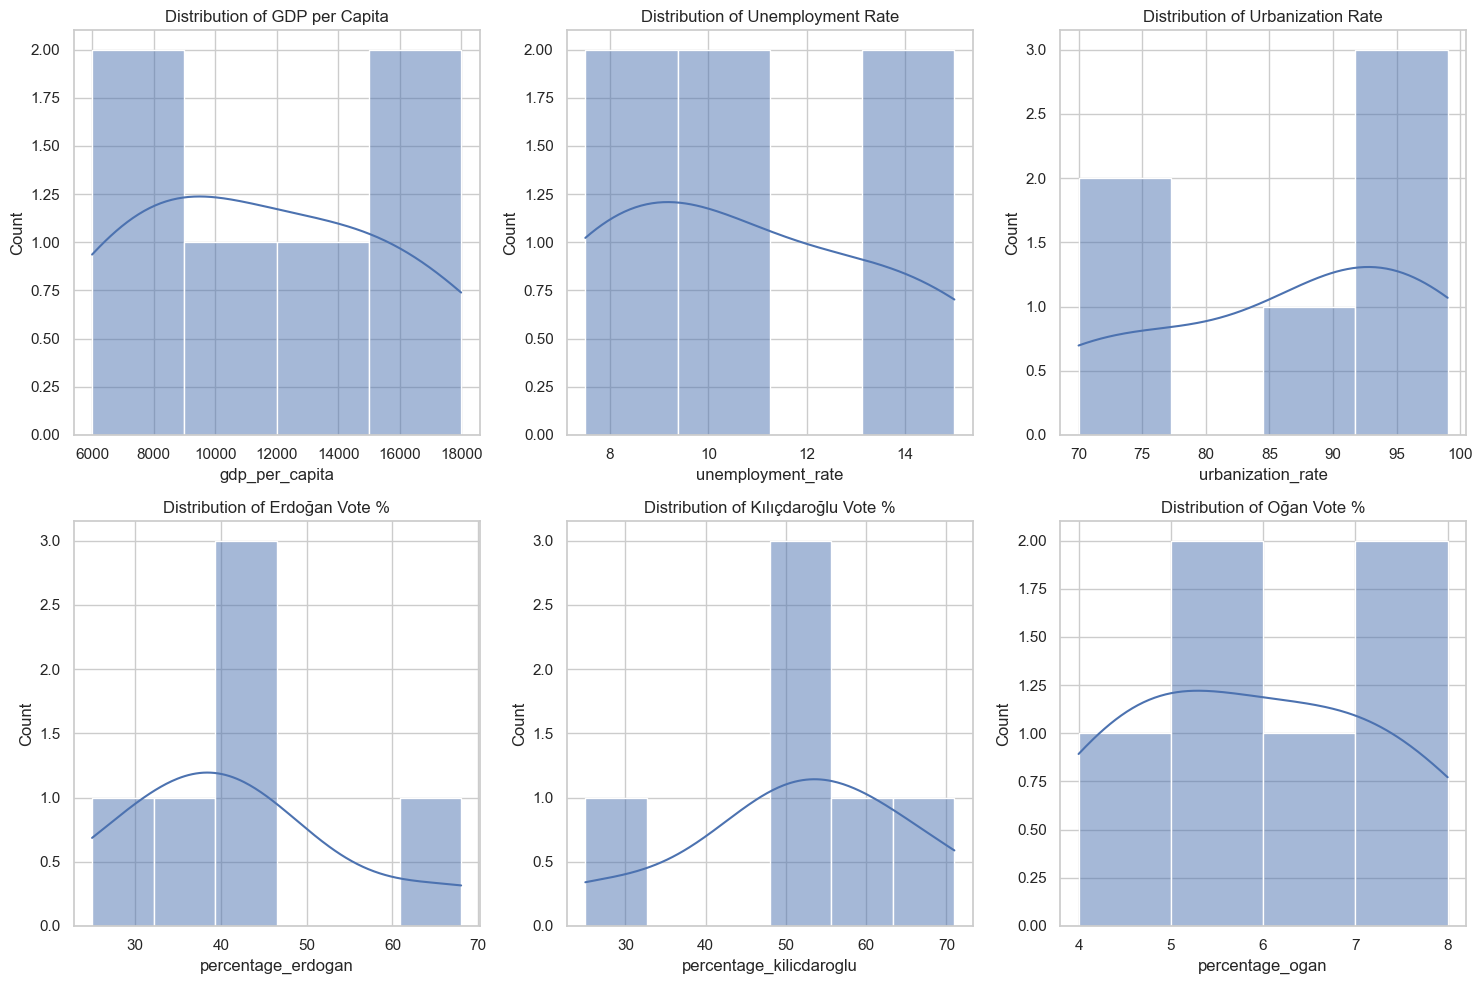

In [10]:
print("\n--- EDA Part 2: Visualizing Distributions ---")

plt.figure(figsize=(15, 10)) # Make the figure a bit larger

# Plot 1: GDP per Capita
plt.subplot(2, 3, 1) # Arrange plots in a 2x3 grid, this is the 1st plot
sns.histplot(df_merged['gdp_per_capita'], kde=True) # Histogram with density curve
plt.title('Distribution of GDP per Capita')

# Plot 2: Unemployment Rate
plt.subplot(2, 3, 2) # 2nd plot
sns.histplot(df_merged['unemployment_rate'], kde=True)
plt.title('Distribution of Unemployment Rate')

# Plot 3: Urbanization Rate
plt.subplot(2, 3, 3) # 3rd plot
sns.histplot(df_merged['urbanization_rate'], kde=True)
plt.title('Distribution of Urbanization Rate')

# Plot 4: Erdoğan Vote Percentage (Check if column exists first)
if 'percentage_erdogan' in df_merged.columns:
    plt.subplot(2, 3, 4) # 4th plot
    sns.histplot(df_merged['percentage_erdogan'], kde=True)
    plt.title('Distribution of Erdoğan Vote %')
else:
    print("Column 'percentage_erdogan' not found for plotting.")

# Plot 5: Kılıçdaroğlu Vote Percentage
if 'percentage_kilicdaroglu' in df_merged.columns:
    plt.subplot(2, 3, 5) # 5th plot
    sns.histplot(df_merged['percentage_kilicdaroglu'], kde=True)
    plt.title('Distribution of Kılıçdaroğlu Vote %')
else:
     print("Column 'percentage_kilicdaroglu' not found for plotting.")

# Plot 6: Oğan Vote Percentage
if 'percentage_ogan' in df_merged.columns:
    plt.subplot(2, 3, 6) # 6th plot
    sns.histplot(df_merged['percentage_ogan'], kde=True)
    plt.title('Distribution of Oğan Vote %')
else:
     print("Column 'percentage_ogan' not found for plotting.")


plt.tight_layout() # Adjust spacing between plots
plt.show() # Display the plots

Explanation:
This cell visualizes the distribution (how frequently different values occur) of several key variables using histograms.

plt.figure() creates the plotting area.

plt.subplot() arranges multiple plots in a grid.

sns.histplot() creates the histogram. kde=True adds a smooth line (Kernel Density Estimate) to help visualize the shape.

We add titles to each plot for clarity.

plt.tight_layout() prevents plot titles and labels from overlapping.

plt.show() displays the generated figure.

We include checks (if 'column_name' in df_merged.columns:) to prevent errors if a candidate's column name wasn't generated correctly during the pivot/rename step.

Caveat: With only 6 data points, these histograms will look very sparse and aren't very informative about the true distribution across all provinces.

# 10: EDA - Correlation Analysis


--- EDA Part 3: Correlation Matrix ---


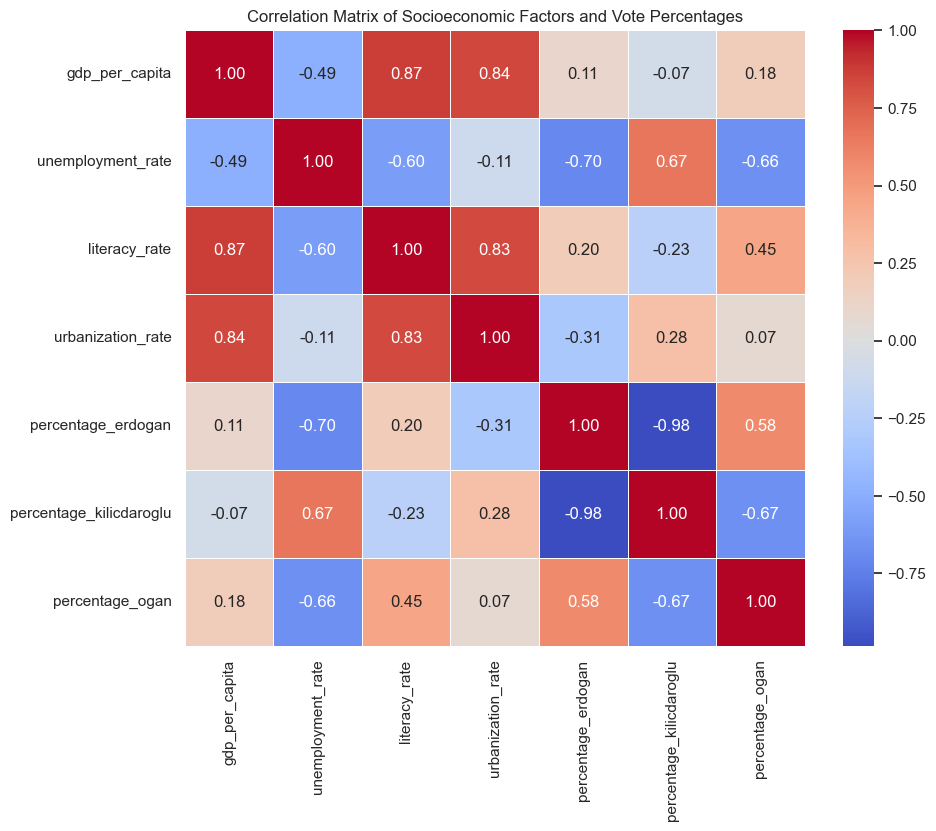


Interpreting the heatmap:
- Values close to +1 indicate strong positive linear correlation.
- Values close to -1 indicate strong negative linear correlation.
- Values close to 0 indicate weak or no linear correlation.


In [11]:
print("\n--- EDA Part 3: Correlation Matrix ---")

# Select columns for the correlation analysis
corr_cols = ['gdp_per_capita', 'unemployment_rate', 'literacy_rate', 'urbanization_rate']
# Add percentage columns only if they exist in the dataframe
if 'percentage_erdogan' in df_merged.columns: corr_cols.append('percentage_erdogan')
if 'percentage_kilicdaroglu' in df_merged.columns: corr_cols.append('percentage_kilicdaroglu')
if 'percentage_ogan' in df_merged.columns: corr_cols.append('percentage_ogan')

# Calculate the correlation matrix
correlation_matrix = df_merged[corr_cols].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Socioeconomic Factors and Vote Percentages')
plt.show()

print("\nInterpreting the heatmap:")
print("- Values close to +1 indicate strong positive linear correlation.")
print("- Values close to -1 indicate strong negative linear correlation.")
print("- Values close to 0 indicate weak or no linear correlation.")
print("WARNING: Correlations based on n=6 are highly unreliable.")

Explanation:
This cell explores the linear relationships between pairs of variables.

We select the numeric columns of interest (socioeconomic indicators and vote percentages).

.corr() calculates the Pearson correlation coefficient between every pair of selected columns.

sns.heatmap() visualizes this matrix.

annot=True displays the correlation values on the heatmap.

cmap='coolwarm' sets the color scheme (red for positive, blue for negative).

fmt=".2f" formats the numbers to two decimal places.

This helps quickly identify potential positive or negative linear associations. However, with n=6, any observed correlation is likely due to chance and should not be trusted.

# 11: EDA - Specific Relationships (Scatter Plots)


--- EDA Part 4: Specific Scatter Plots ---


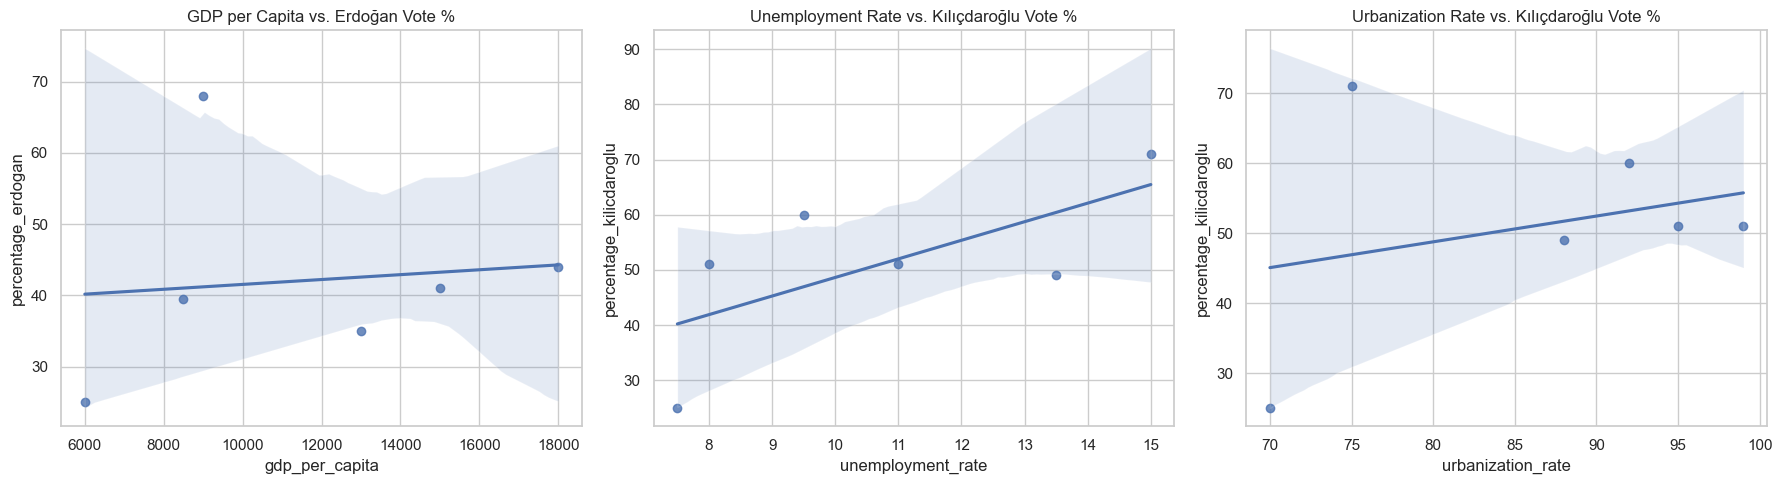

INFO: Each point represents a province. The line shows the linear trend.


In [12]:
print("\n--- EDA Part 4: Specific Scatter Plots ---")

plt.figure(figsize=(18, 5)) # Wider figure for side-by-side plots

# Plot 1: GDP vs Erdoğan %
if 'gdp_per_capita' in df_merged.columns and 'percentage_erdogan' in df_merged.columns:
    plt.subplot(1, 3, 1) # 1x3 grid, 1st plot
    sns.regplot(data=df_merged, x='gdp_per_capita', y='percentage_erdogan')
    plt.title('GDP per Capita vs. Erdoğan Vote %')
else:
    print("Skipping GDP vs Erdogan plot - columns missing.")

# Plot 2: Unemployment vs Kılıçdaroğlu %
if 'unemployment_rate' in df_merged.columns and 'percentage_kilicdaroglu' in df_merged.columns:
    plt.subplot(1, 3, 2) # 1x3 grid, 2nd plot
    sns.regplot(data=df_merged, x='unemployment_rate', y='percentage_kilicdaroglu')
    plt.title('Unemployment Rate vs. Kılıçdaroğlu Vote %')
else:
    print("Skipping Unemployment vs Kilicdaroglu plot - columns missing.")

# Plot 3: Urbanization vs Kılıçdaroğlu %
if 'urbanization_rate' in df_merged.columns and 'percentage_kilicdaroglu' in df_merged.columns:
    plt.subplot(1, 3, 3) # 1x3 grid, 3rd plot
    sns.regplot(data=df_merged, x='urbanization_rate', y='percentage_kilicdaroglu')
    plt.title('Urbanization Rate vs. Kılıçdaroğlu Vote %')
else:
    print("Skipping Urbanization vs Kilicdaroglu plot - columns missing.")

plt.tight_layout()
plt.show()
print("INFO: Each point represents a province. The line shows the linear trend.")
print("WARNING: Trends based on n=6 are highly unreliable.")

Explanation:
We create scatter plots to visualize the relationship between specific pairs of variables identified as potentially interesting (or related to our hypotheses).

sns.regplot() creates a scatter plot and automatically fits and draws a linear regression line, helping to visualize the trend.

These plots give a more detailed view than the correlation matrix but are still limited by the small sample size.

# 12: Hypothesis Testing - Setup

In [14]:
print("--- Hypothesis Testing ---")
# Set the significance level (alpha)
# This is the probability threshold for rejecting the null hypothesis
alpha = 0.05
print(f"Significance level (alpha) set to: {alpha}")



--- Hypothesis Testing ---
Significance level (alpha) set to: 0.05


# 13: Hypothesis Test 1: GDP vs Erdoğan Vote %

In [15]:
print("\n--- Hypothesis 1: GDP per Capita vs. Erdoğan Vote % ---")
# H0 (Null Hypothesis): There is NO correlation between GDP per capita and Erdoğan's vote percentage (r = 0).
# Ha (Alternative Hypothesis): There IS a correlation between GDP per capita and Erdoğan's vote percentage (r != 0).

# Check if the required columns exist
if 'gdp_per_capita' in df_merged.columns and 'percentage_erdogan' in df_merged.columns:
    # Check for sufficient data points and variance
    if len(df_merged['gdp_per_capita'].dropna()) > 2 and len(df_merged['percentage_erdogan'].dropna()) > 2 and \
       df_merged['gdp_per_capita'].var() > 0 and df_merged['percentage_erdogan'].var() > 0:

        # Perform Pearson correlation test
        corr_gdp_erdogan, p_gdp_erdogan = stats.pearsonr(df_merged['gdp_per_capita'].dropna(), df_merged['percentage_erdogan'].dropna())

        print(f"Pearson Correlation Test Results:")
        print(f"  Correlation coefficient (r): {corr_gdp_erdogan:.3f}")
        print(f"  p-value: {p_gdp_erdogan:.3f}")

        # Interpret the result based on alpha
        if p_gdp_erdogan < alpha:
            print(f"  Result: p-value ({p_gdp_erdogan:.3f}) < alpha ({alpha}), Reject H0.")
            print("  Conclusion: There IS a statistically significant linear correlation (at alpha=0.05).")
            if corr_gdp_erdogan > 0:
                print("  Interpretation: Higher GDP per capita is associated with higher vote percentage for Erdoğan (in this *very small* sample).")
            else:
                 print("  Interpretation: Higher GDP per capita is associated with lower vote percentage for Erdoğan (in this *very small* sample).")
        else:
            print(f"  Result: p-value ({p_gdp_erdogan:.3f}) >= alpha ({alpha}), Fail to Reject H0.")
            print("  Conclusion: There is NO statistically significant linear correlation (at alpha=0.05).")
    else:
        print("Skipping test: Insufficient data points (need > 2) or zero variance in one of the variables.")
else:
    print("Skipping test: Required columns ('gdp_per_capita' or 'percentage_erdogan') not found in the merged data.")


--- Hypothesis 1: GDP per Capita vs. Erdoğan Vote % ---
Pearson Correlation Test Results:
  Correlation coefficient (r): 0.108
  p-value: 0.839
  Result: p-value (0.839) >= alpha (0.05), Fail to Reject H0.
  Conclusion: There is NO statistically significant linear correlation (at alpha=0.05).


Explanation:
This cell tests the first hypothesis: is there a linear relationship between GDP per capita and Erdoğan's vote percentage?

We state the null (H0) and alternative (Ha) hypotheses clearly.

We check if the necessary columns exist and if there's enough data (>2 points) and some variation in the data to perform the test.

stats.pearsonr() calculates the Pearson correlation coefficient (r) and the corresponding p-value.

We print r and the p-value.

We compare the p-value to alpha (0.05).

If p < alpha, we reject H0 and conclude there is a statistically significant linear correlation. We also note the direction (positive/negative).

If p >= alpha, we fail to reject H0 and conclude there isn't enough evidence for a significant linear correlation.

# 14: Hypothesis Test 2: Urban vs Rural Voting (Kılıçdaroğlu)

In [16]:
print("\n--- Hypothesis 2: Urban vs. Rural Voting (Kılıçdaroğlu Vote %) ---")
# H0: The mean vote percentage for Kılıçdaroğlu is the SAME in urban and rural areas.
# Ha: The mean vote percentage for Kılıçdaroğlu is DIFFERENT in urban and rural areas.

# Check if required columns exist
if 'urbanization_rate' in df_merged.columns and 'percentage_kilicdaroglu' in df_merged.columns:
    # Define urban/rural based on a threshold (e.g., median or a fixed value)
    # Using median for this example, requires at least a few data points
    if len(df_merged['urbanization_rate'].dropna()) >= 3:
        urban_threshold = df_merged['urbanization_rate'].median()
        print(f"Defining 'Urban' as urbanization rate >= {urban_threshold:.1f}% (median)")
        df_merged['area_type'] = df_merged['urbanization_rate'].apply(lambda x: 'Urban' if pd.notna(x) and x >= urban_threshold else ('Rural' if pd.notna(x) else None))

        # Separate the vote percentages for the two groups
        urban_votes = df_merged[df_merged['area_type'] == 'Urban']['percentage_kilicdaroglu'].dropna()
        rural_votes = df_merged[df_merged['area_type'] == 'Rural']['percentage_kilicdaroglu'].dropna()

        print(f"Number of Urban provinces in sample: {len(urban_votes)}")
        print(f"Number of Rural provinces in sample: {len(rural_votes)}")

        # Check if we have enough data in both groups to perform the test
        if len(urban_votes) > 1 and len(rural_votes) > 1:
            # Perform independent samples t-test
            # Assumes roughly equal variances by default, can add equal_var=False if needed
            t_stat, p_urban_rural = stats.ttest_ind(urban_votes, rural_votes)

            print(f"\nIndependent Samples t-test Results:")
            print(f"  t-statistic: {t_stat:.3f}")
            print(f"  p-value: {p_urban_rural:.3f}")

            # Interpret the result
            if p_urban_rural < alpha:
                print(f"  Result: p-value ({p_urban_rural:.3f}) < alpha ({alpha}), Reject H0.")
                print("  Conclusion: There IS a statistically significant difference in mean vote percentages between Urban and Rural areas (at alpha=0.05).")
                mean_urban = urban_votes.mean()
                mean_rural = rural_votes.mean()
                print(f"  Interpretation: Urban areas (mean={mean_urban:.2f}%) voted significantly differently for Kılıçdaroğlu than Rural areas (mean={mean_rural:.2f}%) (in this *very small* sample).")
            else:
                print(f"  Result: p-value ({p_urban_rural:.3f}) >= alpha ({alpha}), Fail to Reject H0.")
                print("  Conclusion: There is NO statistically significant difference in mean vote percentages between Urban and Rural areas (at alpha=0.05).")
        else:
            print("\nSkipping t-test: Insufficient data points (> 1) in one or both groups (Urban/Rural).")
    else:
        print("Skipping test: Not enough data points to calculate median for Urban/Rural split.")
else:
    print("Skipping test: Required columns ('urbanization_rate' or 'percentage_kilicdaroglu') not found.")


--- Hypothesis 2: Urban vs. Rural Voting (Kılıçdaroğlu Vote %) ---
Defining 'Urban' as urbanization rate >= 90.0% (median)
Number of Urban provinces in sample: 3
Number of Rural provinces in sample: 3

Independent Samples t-test Results:
  t-statistic: 0.416
  p-value: 0.699
  Result: p-value (0.699) >= alpha (0.05), Fail to Reject H0.
  Conclusion: There is NO statistically significant difference in mean vote percentages between Urban and Rural areas (at alpha=0.05).


Explanation:
This cell tests the second hypothesis: do urban and rural areas vote differently for Kılıçdaroğlu, on average?

We state H0 and Ha.

We first create a categorical variable area_type based on the urbanization_rate. Here, we use the median urbanization rate in our sample as the threshold (you could choose a fixed percentage like 75% instead).

We separate Kılıçdaroğlu's vote percentages into two groups based on area_type.

We check if we have at least 2 data points in each group (urban and rural) to perform the test.

stats.ttest_ind() performs an independent samples t-test, which compares the means of two independent groups. It returns the t-statistic and the p-value.

We compare the p-value to alpha and interpret the result, stating whether there's a significant difference in the average vote share between the groups in our sample.

# 15: Hypothesis Test 3: Unemployment vs Kılıçdaroğlu Vote %

In [17]:
print("\n--- Hypothesis 3: Unemployment Rate vs. Kılıçdaroğlu Vote % ---")
# H0: There is NO correlation between unemployment rate and Kılıçdaroğlu's vote percentage (r = 0).
# Ha: There IS a correlation between unemployment rate and Kılıçdaroğlu's vote percentage (r != 0).

# Check if required columns exist
if 'unemployment_rate' in df_merged.columns and 'percentage_kilicdaroglu' in df_merged.columns:
    # Check for sufficient data points and variance
    if len(df_merged['unemployment_rate'].dropna()) > 2 and len(df_merged['percentage_kilicdaroglu'].dropna()) > 2 and \
       df_merged['unemployment_rate'].var() > 0 and df_merged['percentage_kilicdaroglu'].var() > 0:

        # Perform Pearson correlation test
        corr_unemp_kilic, p_unemp_kilic = stats.pearsonr(df_merged['unemployment_rate'].dropna(), df_merged['percentage_kilicdaroglu'].dropna())

        print(f"Pearson Correlation Test Results:")
        print(f"  Correlation coefficient (r): {corr_unemp_kilic:.3f}")
        print(f"  p-value: {p_unemp_kilic:.3f}")

        # Interpret the result
        if p_unemp_kilic < alpha:
            print(f"  Result: p-value ({p_unemp_kilic:.3f}) < alpha ({alpha}), Reject H0.")
            print("  Conclusion: There IS a statistically significant linear correlation (at alpha=0.05).")
            if corr_unemp_kilic > 0:
                print("  Interpretation: Higher unemployment rate is associated with higher vote percentage for Kılıçdaroğlu (in this *very small* sample).")
            else:
                 print("  Interpretation: Higher unemployment rate is associated with lower vote percentage for Kılıçdaroğlu (in this *very small* sample).")
        else:
            print(f"  Result: p-value ({p_unemp_kilic:.3f}) >= alpha ({alpha}), Fail to Reject H0.")
            print("  Conclusion: There is NO statistically significant linear correlation (at alpha=0.05).")
    else:
        print("Skipping test: Insufficient data points (need > 2) or zero variance in one of the variables.")
else:
     print("Skipping test: Required columns ('unemployment_rate' or 'percentage_kilicdaroglu') not found.")


--- Hypothesis 3: Unemployment Rate vs. Kılıçdaroğlu Vote % ---
Pearson Correlation Test Results:
  Correlation coefficient (r): 0.666
  p-value: 0.149
  Result: p-value (0.149) >= alpha (0.05), Fail to Reject H0.
  Conclusion: There is NO statistically significant linear correlation (at alpha=0.05).


Explanation:
This cell tests the third hypothesis: is there a linear relationship between the unemployment rate and Kılıçdaroğlu's vote percentage?

The structure and interpretation are identical to Hypothesis Test 1, just using different variables (unemployment_rate and percentage_kilicdaroglu).

We perform the Pearson correlation test and interpret the p-value against alpha.

# 16: Conclusion and Next Steps

## Analysis Summary and Next Steps

**Summary of Findings (Based on HIGHLY LIMITED n=6 Simulated Data):**

*   **Data Processing:** The pipeline for cleaning, pivoting, and merging the election and socioeconomic data was successfully implemented.
*   **EDA:** Basic descriptive statistics and visualizations were generated. Observed patterns (distributions, correlations, trends in scatter plots) are present but **cannot be considered reliable or generalizable** due to the extremely small sample size (n=6).
*   **Hypothesis Testing:** Tests were performed for the specified hypotheses. Any statistically significant results found (p < 0.05) are **highly likely to be spurious** (due to chance) given the sample size. Similarly, failures to find significant results don't mean relationships don't exist in the broader population.

**CRITICAL NEXT STEPS:**

1.  **ACQUIRE COMPREHENSIVE DATA:** The absolute priority is to replace the simulated data with real data scraped/downloaded from Sözcü/YSK and TÜİK, covering **as many of the 81 Turkish provinces as possible.**
2.  **Verify Data Quality:** Carefully check the real data for inconsistencies, errors, and ensure accurate merging based on province names.
3.  **Re-run Analysis:** Execute this entire notebook again using the complete, real dataset.
4.  **Interpret Results Cautiously:** Even with a full dataset, remember that correlation does not imply causation. The analysis reveals associations, not causal links. Consider potential confounding factors not included in the analysis.
5.  **Refine Hypotheses/Analysis:** Based on the results from the full dataset, you might refine your hypotheses or explore other relationships using different statistical techniques or visualizations.